In [11]:
from csv import reader
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
with open("/Users/nicolebasinski/Desktop/repos/erdos-project-2022--atari-HEAD/final_data/ms_pacman/highscore/ravelled_image_data.csv") as obj:
        csv_reader = reader(obj)
        rows_list = []
        for row in csv_reader:
                rr = np.array([int(r) for r in row])
                rows_list.append(rr)
rows = np.array(rows_list)
rows

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [3]:
rows.shape

(35196, 33600)

In [4]:
35196 * 0.2

7039.200000000001

In [45]:
ind = np.random.randint(35196, size=15000)

sample = rows[ind,:]

In [46]:
sample.shape

(15000, 33600)

In [47]:
# X = rows
# X = X/255
X = sample
X = X/255

In [48]:
# takes some time
# sample of 7040    3m 19.4s
# sample of 10000   6m 20.5s
# sample of 15000   
pca = PCA()
pca.fit(X)
pca.components_.shape
# gives back (a,b)\n",
# a is the number of principal components found\n",
# b is the original shape of the data features"

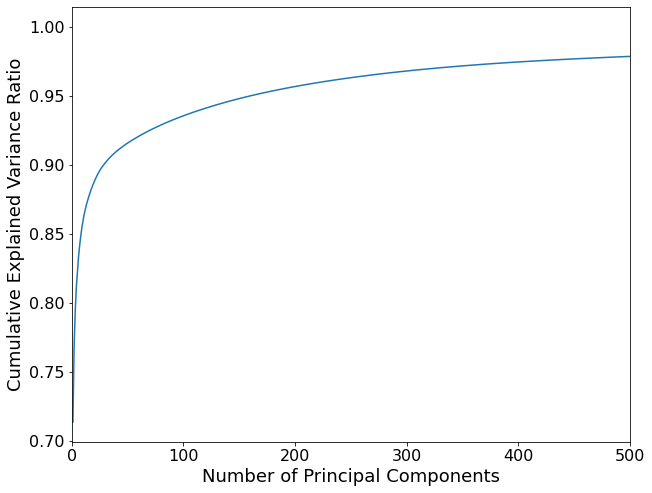

In [12]:
## make the explained variance curve\n",
plt.figure(figsize=(10,8))


plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
            np.cumsum(pca.explained_variance_ratio_))

plt.ylabel("Cumulative Explained Variance Ratio", fontsize=18)
plt.xlabel("Number of Principal Components", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(0,500)

plt.show()

In [13]:
pca = PCA(n_components=.95)

pca.fit(X)

pca.explained_variance_ratio_.shape
# returns the minimum number of components to use to explain the given fraction of variance

(161,)

In [14]:
## RECONSTRUCT
## fit a PCA with 3000 comps
# pca = PCA(n_components=3000)
# pca.fit(X)

## Gives the projection onto the lower dimensional PCA space
X_tilde = pca.transform(X)

In [15]:
## This will give you the reconstruction
## Xtilde dot ws
## TO DO IMAGE SHAPE SHOULD BE 
image_shape = (210,160)
X_tilde[0,:].dot(pca.components_).reshape(image_shape)

array([[-9.22542264e-13,  8.78498086e-14, -4.11593303e-14, ...,
        -3.80202353e-15, -1.31885744e-15,  2.58714922e-15],
       [-8.47150874e-02, -8.47150874e-02, -8.47150874e-02, ...,
        -8.47150874e-02, -8.47150874e-02, -8.47150874e-02],
       [-8.47150874e-02, -8.47150874e-02, -8.47150874e-02, ...,
        -8.47150874e-02, -8.47150874e-02, -8.47150874e-02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

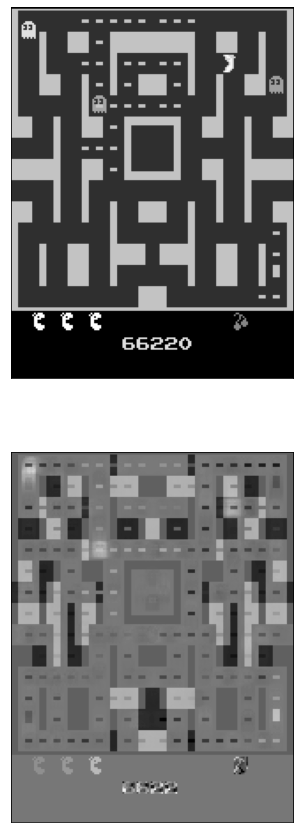

In [40]:
fig, ax = plt.subplots(2,1,figsize=(20,15),
                         subplot_kw = {'xticks':(), 'yticks':()})

n_components = 161
ax[0].imshow(X[100].reshape(image_shape), 
                      cmap='gray')
ax[1].imshow(X_tilde[100,:n_components].dot(pca.components_[:n_components,:]).reshape(image_shape), 
                      cmap='gray')

In [ ]:
set_style("white")

plt.show()
fig, ax = plt.subplots(
    1, 7, figsize=(20, 15), subplot_kw={"xticks": (), "yticks": ()}
)
ax[0, 0].imshow(X[100].reshape(image_shape), cmap="gray")
ax[0, 0].set_title("Original Image", fontsize=16)
i = 1
for n_components in [10, 50, 100, 500, 1000, 3000]:
    ax[0, i].imshow(
        X_tilde[100, :n_components]
        .dot(pca.components_[:n_components, :])
        .reshape(image_shape),
        cmap="gray",
    )
    i = i + 1